#**Yahoo Answers Classification (NLP)**

**Project Title:** Yahoo Answers NLP <br>
**Aim:** To create a deep learning model to analyse the Yahoo Answers. <br>
**Approach:** 
*   Imported all the required libraries and dataset for this project.
*   Exploratory Data Analysis and Visualizing different aspects of the dataset.
*   Finding number of observations and outliers in the dataset.
*   Plotting different attributes of the dataset.
*   Preprocessing of the dataset:
    *   lower case the text
    *   removing punctuations
    *   removing stopwords
    *   removing HTML syntax or URL's
    *   stripping the extra spaces
    *   applying contraction
*   Tokenization of data and applied text to sequence
*    Applying Deep Learning algorithms for the Model Creation such as CNN and LSTM.


# Dataset

The dataset for this project is taken from the Kaggle dataset website. Here is the link for the dataset: https://www.kaggle.com/datasets/yacharki/yahoo-answers-10-categories-for-nlp-csv

# 2. Exploratory Data Analysis (EDA) and Visualization:

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
%matplotlib inline

In [3]:
# Converting integers to strings to understand each label independently.
categories = {1: 'Society & Culture', 2: 'Science & Mathematics', 3: 'Health', 4: 'Education & Reference',
              5: 'Computers & Internet', 6: 'Sports', 7: 'Business & Finance', 8: 'Entertainment & Music',
              9: 'Family & Relationships', 10: 'Politics & Government'}

In [4]:
# Load raw training data using pandas
raw_data = pd.read_csv('/content/drive/MyDrive/content/Yahoo Answers NLP dataset/train.csv')
# Mapping dict to target
raw_data['class_index'] = raw_data['class_index'].map(categories)
raw_data.head(3)

,class_index,question_title,question_content,best_answer
0,Computers & Internet,why doesn't an optical mouse work on a glass t...,or even on some surfaces?,Optical mice use an LED and a camera to rapidl...
1,Sports,What is the best off-road motorcycle trail ?,long-distance trail throughout CA,i hear that the mojave road is amazing!<br />\...
2,Health,What is Trans Fat? How to reduce that?,I heard that tras fat is bad for the body. Wh...,Trans fats occur in manufactured foods during ...


In [5]:
raw_data.shape

(1399999, 4)

In [6]:
# Add question length
raw_data['length'] = raw_data.loc[:, 'question_content'].astype(str).apply(len)

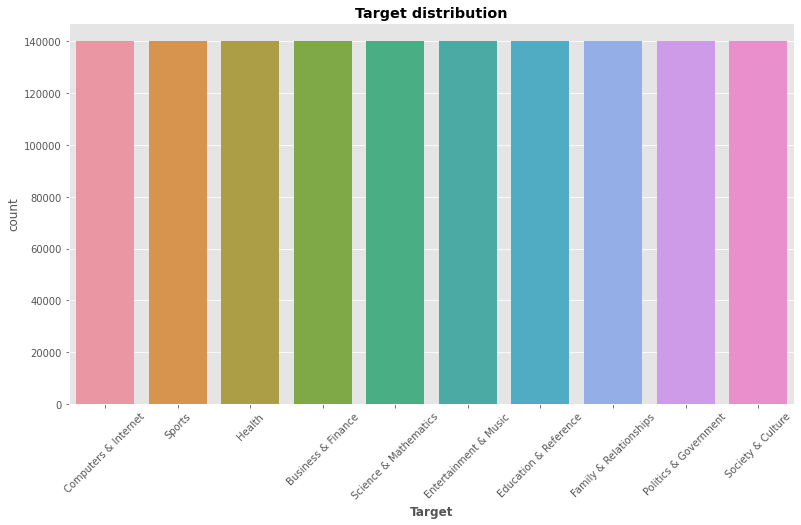

In [7]:
# Target distribution 
plt.figure(figsize=(13, 7)) 
plt.style.use('ggplot')
sns.countplot(x = 'class_index', data = raw_data)
plt.title('Target distribution', fontweight='bold')
plt.xlabel('Target', fontweight='bold')
plt.xticks(rotation=45);

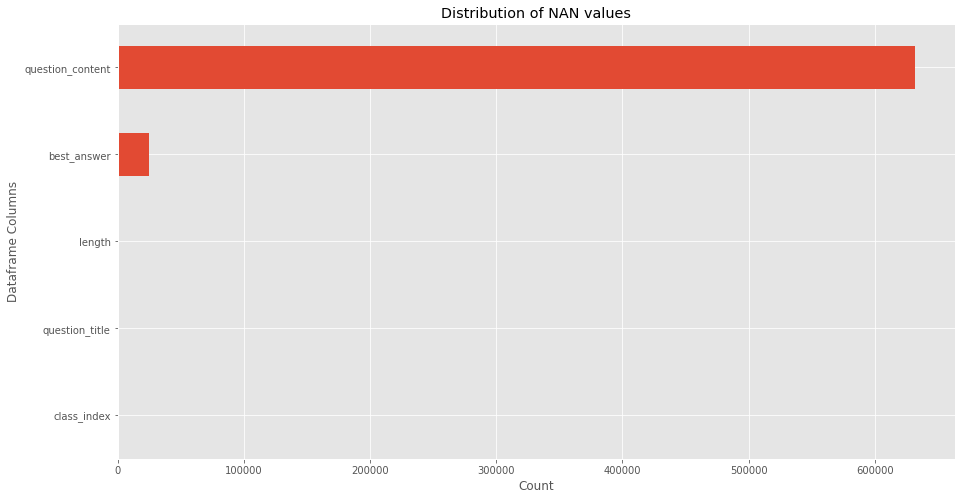

In [8]:
# Exploring NaN values in dataset
fig = plt.figure(figsize=(15, 8))
plt.title("Distribution of NAN values")
plt.xlabel('Count')
plt.ylabel('Dataframe Columns') 
raw_data.isna().sum().sort_values(ascending = True).plot(kind = 'barh')
plt.show();

**Insights from chart above:** <br>
  Almost 46% of the data is missing in content column<br>

1.   Around 0.017% of the data is missing in answers column<br>
2.   Around 0.017% of the data is missing in answers column<br>
3.   We'll drop nan values of content column in preprocessing, this will save us compute and remove irrelavant information.

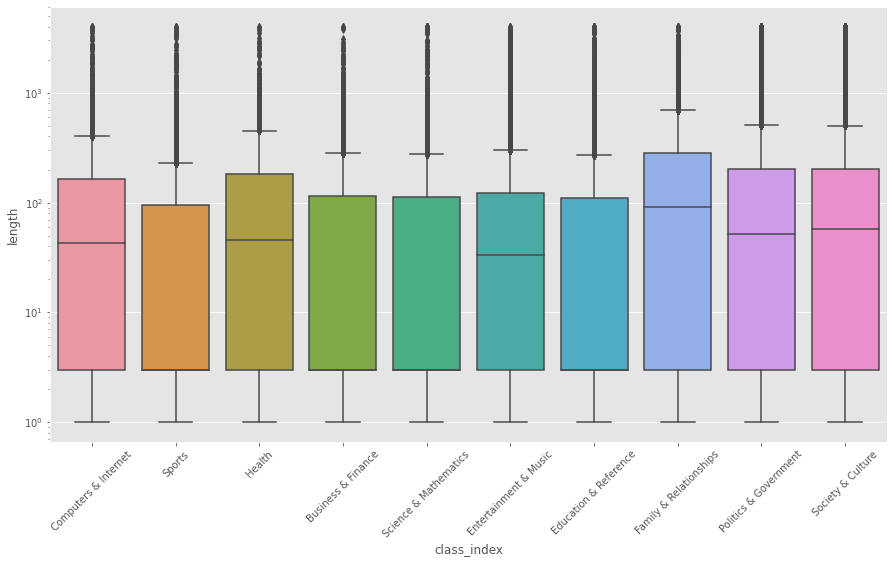

In [9]:
# Boxplot of question lengths per category 
plt.figure(figsize=(15, 8))
g = sns.boxplot(x='class_index', y='length', data=raw_data)
g.set_yscale('log')
plt.xticks(rotation=45)
plt.show();

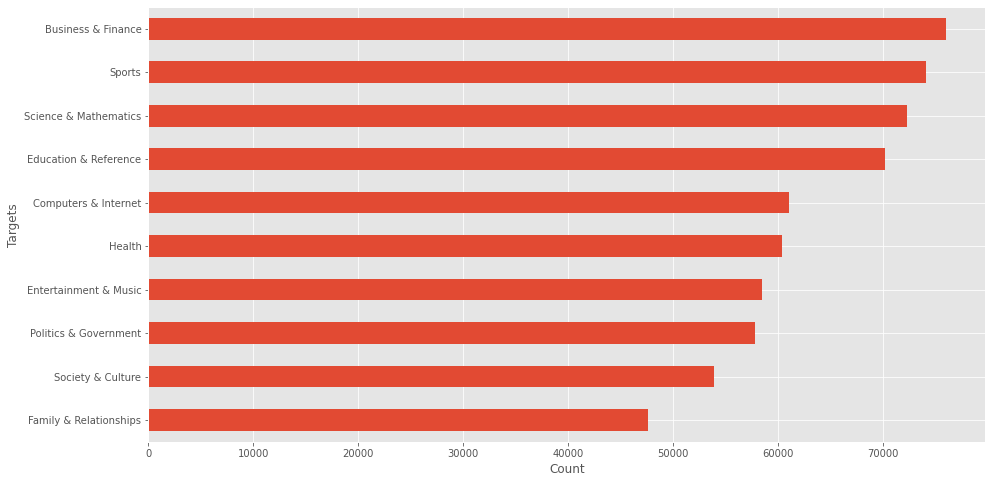

In [10]:
# Checking class distribution of NaN values as content
fig = plt.figure(figsize=(15, 8))
data_isnull = raw_data[raw_data['question_content'].isnull()]
index = pd.Index(data_isnull['class_index'])
index.value_counts().sort_values(ascending = True).plot(kind = 'barh')
plt.ylabel('Targets') 
plt.xlabel('Count')
plt.show();

In [11]:
# Function to visualize word cloud for title - top occuring words in the corpus
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show();

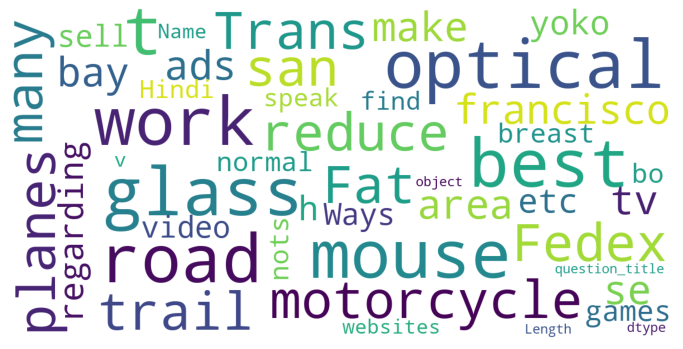

In [12]:
# For title column
show_wordcloud(raw_data['question_title'])

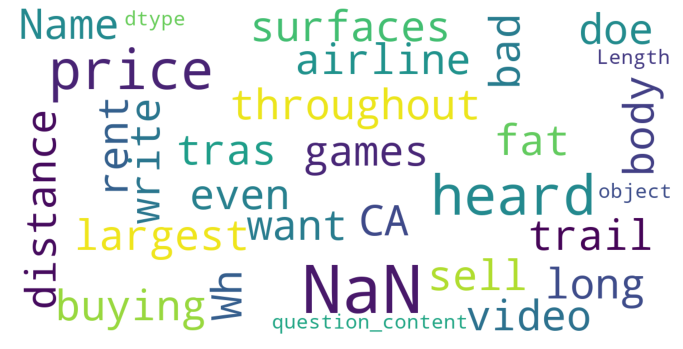

In [13]:
#@ For content column
show_wordcloud(raw_data['question_content'])

# 3. Model Creation

In [14]:
#Tensorflow and Keras and sklearn
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Embedding, Dense, GRU, Dropout, Bidirectional, SpatialDropout1D
from tensorflow.keras.layers import Embedding
import keras
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

#Charts
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Time
import time
import datetime

#Performance Plot
!pip install contractions
import contractions
import numpy as np
import re
import unicodedata

%matplotlib inline

import string

import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
STOPWORDS = set(stopwords.words('english'))

import warnings
warnings.filterwarnings('ignore')

# fix random seed for reproducibility
seed = 3541
np.random.seed(seed)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 7.8 MB/s 
     |████████████████████████████████| 106 kB 70.3 MB/s 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [15]:
# date_time function

def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()

In [16]:

# Performance Plot

def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]

    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

In [18]:
#Reading DAtaset from csv files to Pandas dataframes
dataset_train = pd.read_csv('/content/drive/MyDrive/content/Yahoo Answers NLP dataset/train.csv')
dataset_test = pd.read_csv('/content/drive/MyDrive/content/Yahoo Answers NLP dataset/test.csv')

In [19]:
#Deleting NaN Rows

dataset_train=dataset_train.dropna()
dataset_test=dataset_test.dropna()

train = dataset_train.sample(frac=1)
test = dataset_test.sample(frac=1)

test = dataset_test.iloc[:100000,:]
val = dataset_train.iloc[:50000,:]
train = dataset_train.iloc[50000:,:]
train = dataset_train.iloc[:100000,:]

# Splitting data to train and validation sets manually, only including neccessary columns

X_train = train['best_answer'].values
y_train = train['class_index'].values

X_val = val['best_answer'].values
y_val = val['class_index'].values

X_test = test['best_answer'].values
y_test = test['class_index'].values

In [20]:
def text_preprocessing(text):
    
    for i in range(len(text)):
        text[i] = text[i].lower()  # Converting to lower case
        text[i] = "".join([char for char in text[i] if char not in string.punctuation])
        text[i] = " ".join([word for word in text[i].split() if word not in STOPWORDS])
        text[i] = " ".join([lemmatizer.lemmatize(word) for word in text[i].split()])
        text[i] = unicodedata.normalize('NFKD', text[i]).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        url_pattern = re.compile(r'https?://\S+|www\.\S+')
        text[i] = url_pattern.sub(r'', text[i])
        text[i] = contractions.fix(text[i])
        html_pattern = re.compile('<.*?>')
        text[i] = html_pattern.sub(r'', text[i])
        
        text[i] = re.sub(r'[^a-zA-Z0-9\s]', '', text[i], re.I|re.A)
        text[i] = re.sub(' +', ' ', text[i])  
        text[i] = text[i].strip() 
    return text

In [21]:
%%time
#Pre-processing the Data (Yahoo Answers)
with tf.device('/GPU:0'):
    X_train = text_preprocessing(X_train)
    X_val = text_preprocessing(X_val)
    X_test = text_preprocessing(X_test)

CPU times: user 43.5 s, sys: 493 ms, total: 44 s
Wall time: 45.8 s


In [22]:
# Tokenazing the Data (Yahoo Answers)

t = Tokenizer(oov_token='<UNK>')
# fit the tokenizer on train documents
t.fit_on_texts(X_train)
t.word_index['<PAD>'] = 0

In [23]:
# Transforming Answers to Sequences

X_train = t.texts_to_sequences(X_train)
X_test = t.texts_to_sequences(X_test)
X_val = t.texts_to_sequences(X_val)

In [24]:
# Calculating the Vocabulary Size and the number of Answers

print("Vocabulary size={}".format(len(t.word_index)))
print("Number of Answers={}".format(t.document_count))

Vocabulary size=252753
Number of Answers=100000


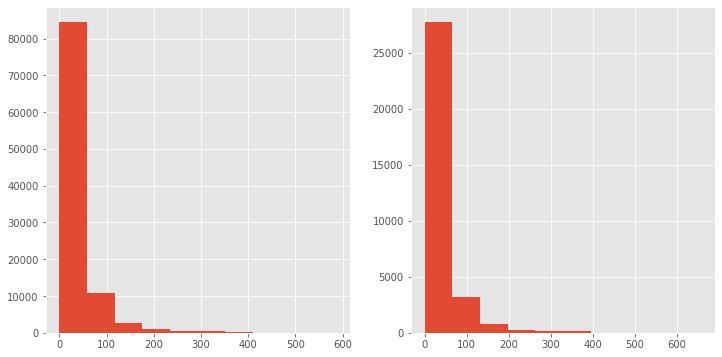

In [25]:
# Plotting the size of the sequences

import matplotlib.pyplot as plt
%matplotlib inline

train_lens = [len(s) for s in X_train]
test_lens = [len(s) for s in X_test]

fig, ax = plt.subplots(1,2, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)

In [26]:
# Padding the dataset to a maximum review length in words

X_train = sequence.pad_sequences(X_train, maxlen=800)
X_test = sequence.pad_sequences(X_test, maxlen=800)
X_val = sequence.pad_sequences(X_val, maxlen=800)

In [27]:
# Encoding Labels

le = LabelEncoder()
num_classes = 10 # 1 = Society & Culture 2 = Science & Mathematics 3 = Health 4 = Education & Reference 5 = Computers & Internet 6 = Sports 7 = Business & Finance 8 = Entertainment & Music 9 = Family & Relationships 10 = Politics & Government

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

# Training the CNN Model for Classification

In [ ]:
# Setting Vocabulary size and Emmbedding size

VOCAB_SIZE = len(t.word_index)
EMBED_SIZE = 800

# Setting an Early_stopping callback to monitor accuracy with a patience degree of 2

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2)

In [ ]:
# Creating the model

modelCNN = Sequential()
# The Embedding layer
modelCNN.add(Embedding(VOCAB_SIZE, EMBED_SIZE, input_length=800))
# The first one dimensional convolutional layer (32,4,same,relu)
modelCNN.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
modelCNN.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
# The first Max pooling layer (2)
modelCNN.add(MaxPooling1D(pool_size=2))
# The first Dropout layer (10%)
modelCNN.add(Dropout(rate=0.10))
# The second one dimensional convolutional layer (32,4,same,relu)
modelCNN.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
modelCNN.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
# The second Max pooling layer (2)
modelCNN.add(MaxPooling1D(pool_size=2))
# The second Dropout layer (10%)
modelCNN.add(Dropout(rate=0.10))
# The third one dimensional convolutional layer (32,4,same,relu)
modelCNN.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
modelCNN.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
# The third Max pooling layer (2)
modelCNN.add(MaxPooling1D(pool_size=2))
# The third Dropout layer (10%)
modelCNN.add(Dropout(rate=0.10))
# The Flattening layer
modelCNN.add(Flatten())
# The First Dense Layer (256,relu)
modelCNN.add(Dense(256, activation='relu'))
# The Second Dense Layer or Prediction layer (1,sigmoid)
modelCNN.add(Dense(10, activation='softmax'))
# Compiling the Model using the Binary_Crossontropy as a loss function and accuracy as a meseaure and Adam as an Optimizer
modelCNN.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
# Displaying the Model Schema
modelCNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 800, 800)          202202400 
                                                                 
 conv1d_6 (Conv1D)           (None, 800, 32)           102432    
                                                                 
 conv1d_7 (Conv1D)           (None, 800, 32)           4128      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 400, 32)          0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 400, 32)           0         
                                                                 
 conv1d_8 (Conv1D)           (None, 400, 64)           8256      
                                                      

In [ ]:
# Training the Model with GPU
with tf.device('/GPU:0'):
     historyCNN = modelCNN.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=20, batch_size=64, verbose=1, callbacks=[callback])

Epoch 1/20
1563/1563 [==============================] - 236s 143ms/step - loss: 1.9663 - accuracy: 0.2957 - val_loss: 1.6938 - val_accuracy: 0.3755
Epoch 2/20
1563/1563 [==============================] - 222s 142ms/step - loss: 1.5907 - accuracy: 0.4439 - val_loss: 1.3586 - val_accuracy: 0.5279
Epoch 3/20
1563/1563 [==============================] - 222s 142ms/step - loss: 1.2695 - accuracy: 0.5633 - val_loss: 1.0385 - val_accuracy: 0.6460
Epoch 4/20
1563/1563 [==============================] - 222s 142ms/step - loss: 0.9885 - accuracy: 0.6693 - val_loss: 0.8071 - val_accuracy: 0.7320
Epoch 5/20
1563/1563 [==============================] - 222s 142ms/step - loss: 0.7579 - accuracy: 0.7515 - val_loss: 0.5744 - val_accuracy: 0.8252
Epoch 6/20
1563/1563 [==============================] - 222s 142ms/step - loss: 0.5889 - accuracy: 0.8108 - val_loss: 0.4547 - val_accuracy: 0.8627
Epoch 7/20
1563/1563 [==============================] - 222s 142ms/step - loss: 0.4717 - accuracy: 0.8522 - val_

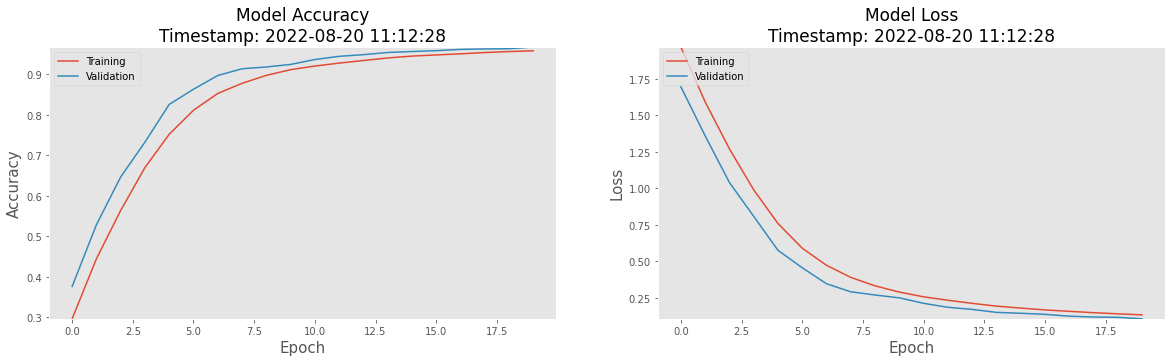

In [ ]:
#Accuracy / Validation_Accuracy  and Loss / Validation_Loss Plot

plot_performance(history = historyCNN)

In [ ]:
# Final evaluation of the model

scores = modelCNN.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

1009/1009 [==============================] - 8s 8ms/step - loss: 4.2023 - accuracy: 0.3897
Accuracy: 38.97%


In [ ]:
modelCNN.save('Yahoo_Answers_CNN.h5')

# Training the LSTM Model for Classification

In [28]:
# Hyperparameters of the model

EMBEDDING_DIM = 800
MAX_SEQUENCE_LENGTH = 800
VOCAB_SIZE = len(t.word_index)

In [29]:
# model initialization
modelstm = Sequential()

# The Embedding Layer
modelstm.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length = MAX_SEQUENCE_LENGTH))

# The LSTM layer (64) 
modelstm.add(LSTM(64))

# The first DEnse layer (24,relu)
modelstm.add(Dense(24, activation='relu'))

# The first Dense layer (10,relu)
modelstm.add(Dense(10, activation='sigmoid'))

# compile model
modelstm.compile(loss='SparseCategoricalCrossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), 
              metrics=['accuracy'])

# model summary
modelstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 800, 800)          202202400 
                                                                 
 lstm (LSTM)                 (None, 64)                221440    
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
Total params: 202,425,650
Trainable params: 202,425,650
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Training the Model with GPU
with tf.device('/GPU:0'):
    history2 = modelstm.fit(X_train, y_train,validation_data=(X_val,y_val), epochs=10, validation_steps=5, batch_size=32 , verbose=1)

Epoch 1/10
3125/3125 [==============================] - 433s 137ms/step - loss: 1.7978 - accuracy: 0.3829 - val_loss: 1.2422 - val_accuracy: 0.5875
Epoch 2/10
3125/3125 [==============================] - 422s 135ms/step - loss: 1.3004 - accuracy: 0.5727 - val_loss: 0.8961 - val_accuracy: 0.6875
Epoch 3/10
3125/3125 [==============================] - 423s 135ms/step - loss: 1.0376 - accuracy: 0.6690 - val_loss: 0.5440 - val_accuracy: 0.8500
Epoch 4/10
3125/3125 [==============================] - 420s 134ms/step - loss: 0.8241 - accuracy: 0.7460 - val_loss: 0.3417 - val_accuracy: 0.9062
Epoch 5/10
3125/3125 [==============================] - 416s 133ms/step - loss: 0.6582 - accuracy: 0.8026 - val_loss: 0.2099 - val_accuracy: 0.9375
Epoch 6/10
3125/3125 [==============================] - 416s 133ms/step - loss: 0.5349 - accuracy: 0.8406 - val_loss: 0.1462 - val_accuracy: 0.9438
Epoch 7/10
3125/3125 [==============================] - 416s 133ms/step - loss: 0.4480 - accuracy: 0.8645 - val_

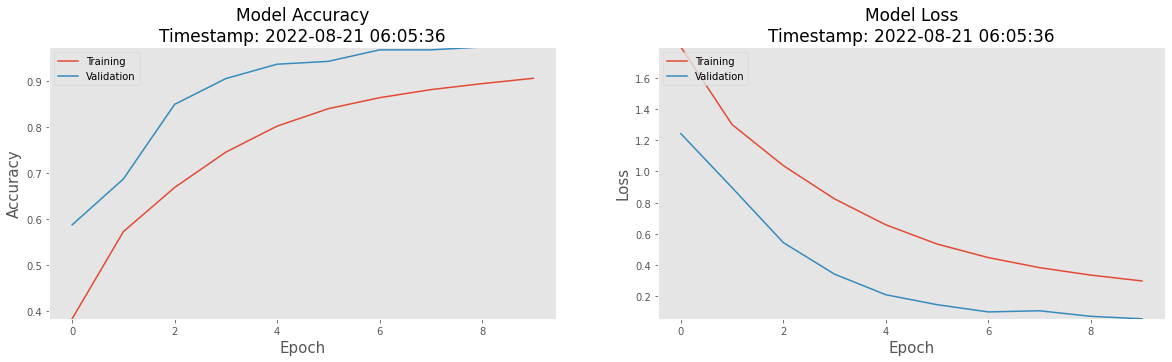

In [31]:
#Accuracy / Validation_Accuracy  and Loss / Validation_Loss Plot
plot_performance(history = history2)

In [33]:
# Final evaluation of the model

scores = modelstm.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

1009/1009 [==============================] - 17s 16ms/step - loss: 2.3215 - accuracy: 0.4626
Accuracy: 46.26%


In [32]:
modelstm.save('Yahoo_Answers_LSTM.h5')

Hence, we have trained tow models: **LSTM**(Accuracy: 46.26%) and **CNN**(38.97%)


Contributed By: **Aadi Jain** <br>

Participant of Social Summer of Code' 2022

    LinkedIn Profile: https://www.linkedin.com/in/aadijain7102/
    GitHub Profile: https://github.com/Aadi71
